### Introduction
This project considers only the bivariate kmeans clustering of mall customers. Thus, only the Annual Income and the Spending Score will be considered in this analysis. However, the entire dataset will be explored during exploration.

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Read File/Data Inspection

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

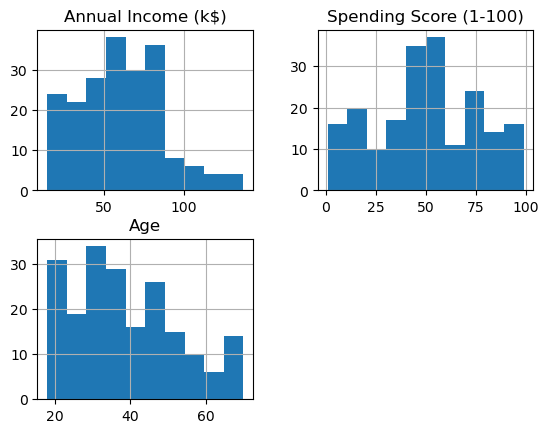

In [5]:
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].hist();

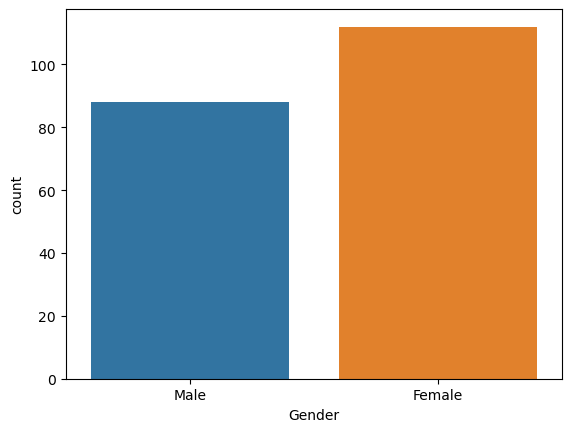

In [6]:
sns.countplot(df['Gender']);

In [7]:
df_gender = df.groupby('Gender')['Annual Income (k$)', 'Spending Score (1-100)', 'Age'].mean()

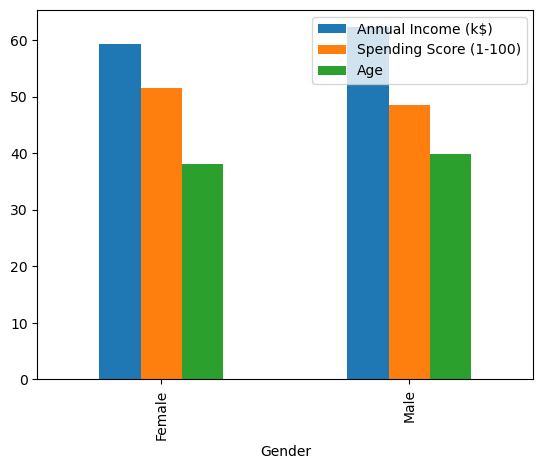

In [8]:
df_gender[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].plot(kind='bar');

### BiVariate Clustering

In [9]:
kmeans = KMeans(random_state=42)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
kmeans.cluster_centers_

array([[ 80.18181818,  12.68181818],
       [ 47.65909091,  51.61363636],
       [ 78.55172414,  82.17241379],
       [ 25.72727273,  20.22727273],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 63.95238095,  46.21428571],
       [109.7       ,  82.        ]])

In [10]:
inertia_lst = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_lst.append(kmeans.inertia_)

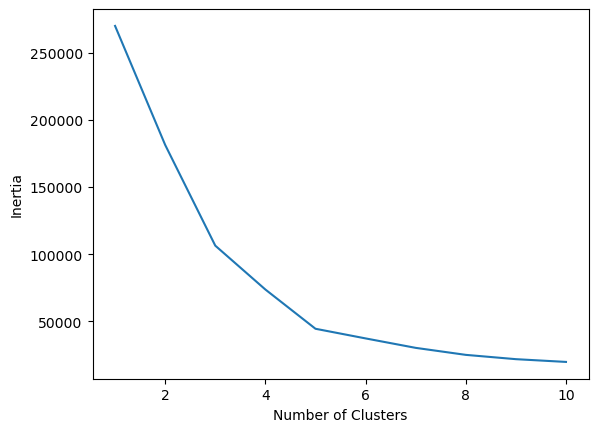

In [11]:
plt.plot(range(1,11), inertia_lst)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

From the chart about, we can assume our number of clusters to be 5

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [13]:
df_clster_center = pd.DataFrame(kmeans.cluster_centers_)
df_clster_center.columns = ['x', 'y']

In [14]:
df['labels'] = kmeans.labels_

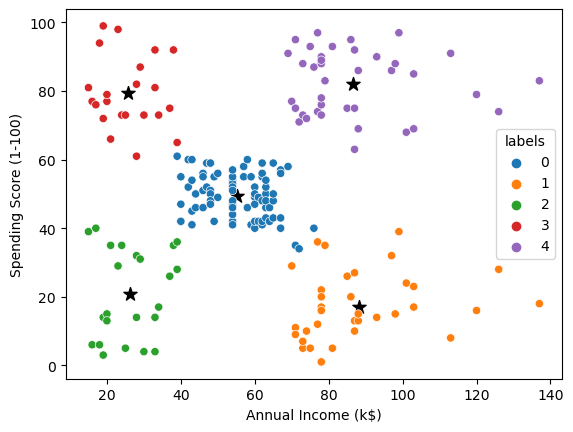

In [15]:
# plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df['labels'])
# (data=clster_center, marker='*')
plt.scatter(x=df_clster_center['x'], y=df_clster_center['y'], s=100, marker='*', c='black')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', palette='tab10');